In [ ]:
import pandas as pd
from datetime import datetime

# Load the datasets
daily_gas_price = pd.read_csv('../data/natural_gas_daily.csv')
daily_oil_price = pd.read_csv('../data/Brent_Oil_Prices.csv')


In [2]:
daily_gas_price.head()

,Date,Price
0,1997-01-07,3.82
1,1997-01-08,3.80
2,1997-01-09,3.61
3,1997-01-10,3.92
4,1997-01-13,4.00


In [3]:
daily_oil_price.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [6]:
# Convert the 'Date' column to datetime format if it isn't already
daily_gas_price['Date'] = pd.to_datetime(daily_gas_price['Date'], errors='coerce')
daily_oil_price['Date'] = pd.to_datetime(daily_oil_price['Date'], errors='coerce')

# Get the range of dates
date_range_gas = (daily_gas_price['Date'].min(), daily_gas_price['Date'].max())
date_range_oil = (daily_oil_price['Date'].min(), daily_oil_price['Date'].max())

print(date_range_oil)
print(date_range_gas)


(Timestamp('1987-05-20 00:00:00'), Timestamp('2022-11-14 00:00:00'))
(Timestamp('1997-01-07 00:00:00'), Timestamp('2020-09-01 00:00:00'))


In [9]:
import pandas as pd
from datetime import datetime

# Ensure the 'Date' columns in both datasets are in datetime format
daily_oil_price['Date'] = pd.to_datetime(daily_oil_price['Date'], format='%d-%m-%Y', errors='coerce').fillna(
    pd.to_datetime(daily_oil_price['Date'], format='%m-%d-%Y', errors='coerce')
)
daily_gas_price['Date'] = pd.to_datetime(daily_gas_price['Date'])

# Rename column 'Price' to 'Oil_price'
daily_oil_price = daily_oil_price.rename(columns={'Price': 'Oil_price'})
daily_gas_price = daily_gas_price.rename(columns={'Price': 'Gas_price'})

# Get the date range from the daily_gas_price dataset
date_min, date_max = daily_gas_price['Date'].min(), daily_gas_price['Date'].max()

# Filter the daily_oil_price data to match the date range in daily_gas_price
filtered_oil_price = daily_oil_price[(daily_oil_price['Date'] >= date_min) & (daily_oil_price['Date'] <= date_max)]

# Merge (left join) the two DataFrames on 'Date'
two_price = pd.merge(filtered_oil_price, daily_gas_price, on='Date', how='left')

# Display the first few rows
print(two_price.head())


        Date  Oil_price  Gas_price
0 1997-01-07      24.76       3.82
1 1997-01-08      24.78       3.80
2 1997-01-09      24.83       3.61
3 1997-01-10      24.22       3.92
4 1997-01-13      23.41       4.00


In [12]:
two_price.columns

Index(['Date', 'Oil_price', 'Gas_price'], dtype='object')

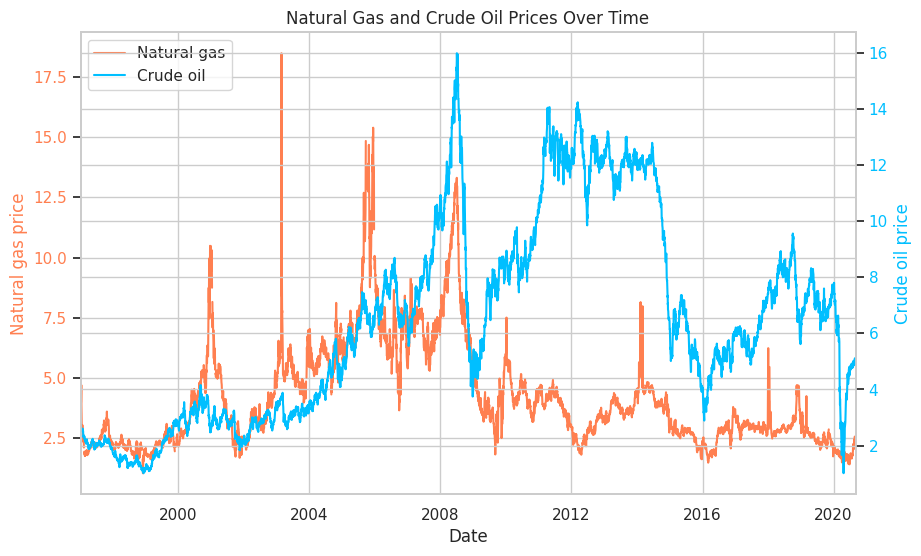

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
sns.set(style="whitegrid")

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Natural Gas Prices
ax1.plot(two_price['Date'], two_price['Gas_price'], color='coral', label='Natural gas')
ax1.set_ylabel('Natural gas price', color='coral')
ax1.tick_params(axis='y', labelcolor='coral')

# Create a secondary y-axis for Crude Oil Prices
ax2 = ax1.twinx()
ax2.plot(two_price['Date'], two_price['Oil_price'] / 9, color='deepskyblue', label='Crude oil')
ax2.set_ylabel('Crude oil price', color='deepskyblue')
ax2.tick_params(axis='y', labelcolor='deepskyblue')

# Set x-axis label and format
ax1.set_xlabel('Date')
ax1.set_xlim(two_price['Date'].min(), two_price['Date'].max())

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Display the plot
plt.title("Natural Gas and Crude Oil Prices Over Time")
plt.show()


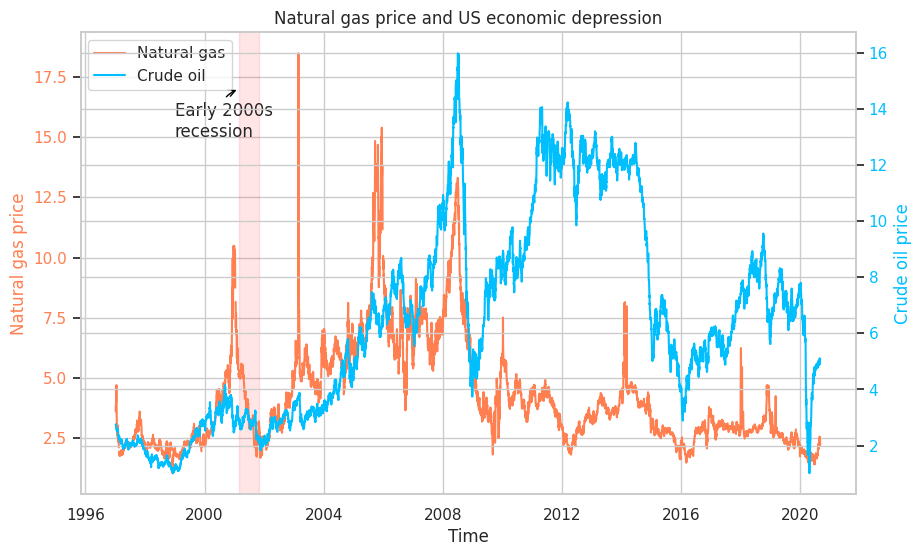

In [14]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.dates as mdates
import seaborn as sns

# Set up the plot style
sns.set(style="whitegrid")

# Create the figure and primary y-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Natural Gas Prices
ax1.plot(two_price['Date'], two_price['Gas_price'], color='coral', label='Natural gas')
ax1.set_ylabel('Natural gas price', color='coral')
ax1.tick_params(axis='y', labelcolor='coral')

# Secondary y-axis for Crude Oil Prices, scaling by dividing by 9
ax2 = ax1.twinx()
ax2.plot(two_price['Date'], two_price['Oil_price'] / 9, color='deepskyblue', label='Crude oil')
ax2.set_ylabel('Crude oil price', color='deepskyblue')
ax2.tick_params(axis='y', labelcolor='deepskyblue')

# Add a red rectangle to highlight a period
ax1.add_patch(
    patches.Rectangle(
        (mdates.date2num(pd.to_datetime('2001-03-01')), -100),  # (xmin, ymin)
        mdates.date2num(pd.to_datetime('2001-11-01')) - mdates.date2num(pd.to_datetime('2001-03-01')),  # width
        200,  # height
        color='red',
        alpha=0.1
    )
)

# Annotate with a curved arrow and text
ax1.annotate(
    'Early 2000s\nrecession',
    xy=(mdates.date2num(pd.to_datetime('2001-03-01')), 17),  # Arrow end position
    xytext=(mdates.date2num(pd.to_datetime('1999-01-01')), 15),  # Text position
    arrowprops=dict(arrowstyle='->', color='black', lw=1, connectionstyle="arc3,rad=-0.5")
)

# Set x-axis, title, and grid
ax1.set_xlabel('Time')
ax1.set_title('Natural gas price and US economic depression')

# Add legends for both lines
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Display the plot
plt.show()


# Data From World Bank

In [16]:
import plotly.express as px
import plotly.graph_objects as go

country_producing = ['United States','Saudi Arabia','Russia','Canada','China','Iraq','UAE','Brazil','Iran','Kuwait']
oil_produced = [19.51,11.81,11.49,5.50,4.89,4.74,4.01,3.67,3.19,2.94]

fig = go.Figure(data=[go.Pie(labels=country_producing,
                             values=oil_produced)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20)
fig.update_layout(title=go.layout.Title(text="<b>World's Largest Oil Producers (mn barrels/day)</b>", font=dict(
                family="Courier New, monospace",
                size=22,
                color="black"
            )))

fig.update_layout(annotations=[
       go.layout.Annotation(
            showarrow=False,
            text=' largest oil producers',
            xanchor='right',
            x=0.75,
            xshift=275,
            yanchor='top',
            y=0.05,
            font=dict(
                family="Courier New, monospace",
                size=12,
                color="black"
            )
        )])
fig.show()

In [17]:
country_consuming = ['United States','China','India','Japan','Russia','Saudi Arabia','Brazil','South Korea','Germany','Canada']
consumption = [19.96,13.57,4.32,3.92,3.69,3.33,3.03,2.63,2.45,2.42]

fig = go.Figure(data=[go.Pie(labels=country_consuming,
                             values=consumption)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20)
fig.update_layout(title=go.layout.Title(text="<b>World's Largest Oil Consumers (mn barrels/day)</b>", font=dict(
                family="Courier New, monospace",
                size=22,
                color="black"
            )))

fig.update_layout(annotations=[
       go.layout.Annotation(
            showarrow=False,
            xanchor='right',
            x=0.75,
            xshift=275,
            yanchor='top',
            y=0.05,
            font=dict(
                family="Courier New, monospace",
                size=12,
                color="black"
            )
        )])

fig['layout']['xaxis'].update(side='top')

fig.show()

In [18]:
country_export = ['Saudi Arabia','Russia','Iraq','Canada','UAE','Kuwait','Iran','United States','Nigeria','Kazakhstan','Angola','Norway','Libya','Mexico','Venezuela']
export = [182.5,129,91.7,66.9,58.4,51.7,50.8,48.3,43.6,37.8,36.5,33.3,26.7,26.5,26.4]

fig = go.Figure(data=[go.Pie(labels=country_export,
                             values=export)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20)
fig.update_layout(title=go.layout.Title(text="<b>World's Largest Oil Exporters (US$ billion)</b>", font=dict(
                family="Courier New, monospace",
                size=22,
                color="black"
            )))

fig.update_layout(annotations=[
       go.layout.Annotation(
            showarrow=False,
            text='largest oil exporters',
            xanchor='right',
            x=0.75,
            xshift=275,
            yanchor='top',
            y=0.05,
            font=dict(
                family="Courier New, monospace",
                size=12,
                color="black"
            )
        )])

fig['layout']['xaxis'].update(side='top')

fig.show()

In [19]:
affected_country = ['Iraq','Libya','Congo Republic','Kuwait','South Sudan','Saudi Arabia','Oman','Equatorial Guinea','Azerbaijan','Angola','Iran','Gabon','Timor-Leste','Qatar','UAE']
oil_rent = [37.8,37.3,36.7,36.6,31.3,23.1,21.8,19.2,17.9,15.8,15.3,15.3,14.5,14.2,13.1]
affected_country = affected_country[::-1]
oil_rent = oil_rent[::-1]


fig = go.Figure(go.Bar(
            x=oil_rent,
            y=affected_country,
            orientation='h',
            text = oil_rent,
            textposition='auto'))
fig.update_traces(marker_color='purple')

fig.update_layout(title=go.layout.Title(text="<b>Countries Heavily Dependent on Oil Profits to Power GDP</b>", font=dict(
                family="Courier New, monospace",
                size=22,
                color="black"
            )))
fig.update_layout(annotations=[
       go.layout.Annotation(
            showarrow=False,
            text='dependent on oil for GDP',
            xanchor='right',
            x=35,
            xshift=275,
            yanchor='top',
            y=0.05,
            font=dict(
                family="Courier New, monospace",
                size=10,
                color="black"
            )
        )])

fig['layout']['xaxis'].update(side='bottom')

fig.show()